# <b><p style="text-align: center;">EDOS Data Analysis</p></b>

## **Reading the data**

In [1]:
import pandas as pd
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

edos = pd.read_csv('../edos/data/edos_labelled_aggregated.csv')
edos.set_index('rewire_id', inplace=True)
edos

,text,label_sexist,label_category,label_vector,split
rewire_id,,,,,
sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape you back! #NSFW ""In Nigeria, if you rape a woman, guys rape you back!"" by [USER] [URL]",not sexist,none,none,dev
sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,none,none,train
sexism2022_english-13149,"This is like the Metallica video where the poor mutilated bastard was saying ""Please kill me"" over and over again, only with emojis instead of Morse code.",not sexist,none,none,train
sexism2022_english-13021,woman?,not sexist,none,none,train
sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
...,...,...,...,...,...
sexism2022_english-5228,girls really get fucked almost every weekend ?,not sexist,none,none,train
sexism2022_english-10140,"The hatred for moslems are Reasonable and Justified. They openly call for our subjugation, the rapes of our women and children, our slavery, and our death. I'm not going to coexist with them.",not sexist,none,none,train
sexism2022_english-9726,Now this is a woman who gets it. 👆,not sexist,none,none,train


## **Labels Analysis**

### Setting up plot formatting

In [2]:
import matplotlib.pyplot as plt

# set chart colors
colors = ['#f68c65', '#FFE1C6', '#FFF7AE', '#ABC4AE', '#BECBDA',
          '#fac7d3', '#E2D5CA', '#7DCE82', '#75E6E0', '#DAD4EF',
          '#F0B46A', '#FDAFB3']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [3]:
def pie_autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

### Task A's labels distribution and counts

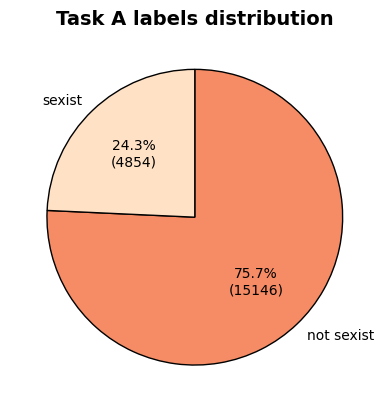

In [4]:
# pie chart
plt.pie(edos['label_sexist'].value_counts(),
        labels=edos['label_sexist'].unique(),
        startangle=90,
        counterclock=False,
        wedgeprops=dict(edgecolor='black'),
        autopct=pie_autopct_format(edos['label_sexist'].value_counts()))
plt.title("Task A labels distribution", fontdict=dict(weight='bold', size=14))
plt.savefig('task_a_labels_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

5 random samples from the each label:

In [5]:
# sexist samples:
sexist = edos[edos['label_sexist'] == 'sexist'].sample(5).reset_index(drop=True)
print('5 random sexist samples:')
print(sexist['text'].values, '\n')

# not-sexist samples:
not_sexist = edos[edos['label_sexist'] == 'not sexist'].sample(5).reset_index(drop=True)
print('5 random not sexist samples:')
print(not_sexist['text'].values)

5 random sexist samples:
['Ms...Fernandez killed her 8 year old son because she thought he was "gay" No words about a father being involved with the child. How about having something other than a female around to mentor and direct a boy into manhood?'
 'AWALT. The guy had social status, so she attached to it instantly.'
 "Don't be sad - she is just a stupid 'ho."
 'When it pertains to women, the size of her tits is directly proportional to the length of the hug I give.'
 'yeah it sucks being a white man now. We see inferiors promoted above us our women going off with savages, half breed children in tow. What do we have left to lose?'] 

5 random not sexist samples:
["they're all at chad's kegger tonight. they'll get back to LARPing tomorrow morning"
 'Better way to repay the debt to us Americans, kick those mother fucking Muslims out of England. 100% of them need to be deported. Islam is the new Nazi.'
 'Dude, i highly doubt i was better looking than you were at 15-20. i was a small ac

### Task B's labels distribution and counts

In [6]:
edos_sexist = edos[edos['label_sexist'] == 'sexist']
edos_sexist

,text,label_sexist,label_category,label_vector,split
rewire_id,,,,,
sexism2022_english-7228,[USER] Leg day is easy. Hot girls who wear miniskirts get asked out.,sexist,3. animosity,3.3 backhanded gendered compliments,train
sexism2022_english-872,I get a new pussy every other week or whenever i want really. Didnt have to learn how to either from YouTube videos. Also PUAs dont get laid. At best they get 5/10 asian ladies after spending years pretending to be something they aren't. Its pathetic,sexist,2. derogation,2.3 dehumanising attacks & overt sexual objectification,train
sexism2022_english-3553,"I agree with that but at the same time I know myself well enough to say I can’t love a woman. The minute she begins to hit the wall and some hotter, younger women enters the picture, it’s time for impulse control because I’m going to want that.",sexist,2. derogation,2.1 descriptive attacks,dev
sexism2022_english-14992,O come on there's no way any men are attracted to her shes a pig🙄,sexist,2. derogation,2.3 dehumanising attacks & overt sexual objectification,train
sexism2022_english-13328,"democrats from Minnesota (leftist muzzie shithole) are the dumbest anti-americans there are. KLobuchar, one of the reps. is a dumb bitch who has a moronic position on the tax bill. Fuck this stupid woman",sexist,2. derogation,2.2 aggressive and emotive attacks,dev
...,...,...,...,...,...
sexism2022_english-17659,"This is easily the dumbest thing ever written. Hot pussy craves J. Todd Kincannon. It always has. It always will. I don't care if gross pussy doesn't like me. What do you think I am, some kind of psycho?",sexist,2. derogation,2.3 dehumanising attacks & overt sexual objectification,train
sexism2022_english-13737,"Recently some thots started advertizing their onlyfans on linkedin, i saw some posts of chat messages.",sexist,3. animosity,"3.1 casual use of gendered slurs, profanities, and insults",train
sexism2022_english-8065,"I wish yall understand what a burden it can be for a woman to get pregnant or to have sex. So keep your legs closed, you dirty slut. Nobody is forcing you to fuck unemployed men who don’t commit - that is 100% your choice.",sexist,2. derogation,2.2 aggressive and emotive attacks,train


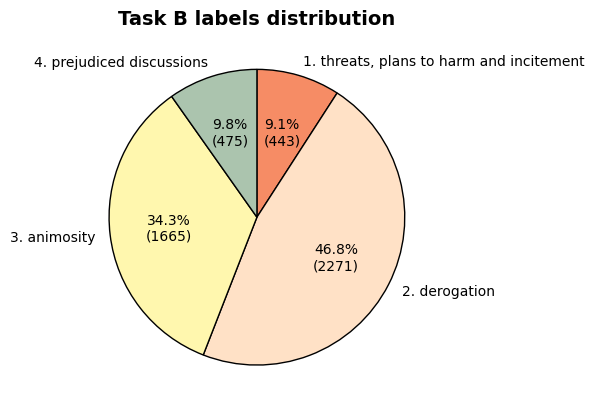

In [7]:
import numpy as np

b_labels, b_counts = np.unique(edos_sexist['label_category'], return_counts=True)
b_labels, b_counts = sorted(b_labels), b_counts[np.argsort(b_labels)]
plt.pie(b_counts,
        labels=b_labels,
        startangle=90,
        counterclock=False,
        wedgeprops=dict(edgecolor='black'),
        autopct=pie_autopct_format(edos_sexist['label_category'].value_counts()))
plt.title("Task B labels distribution", fontdict=dict(weight='bold', size=14))
plt.savefig('task_b_labels_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Sample for each label:

In [8]:
for label in b_labels:
    print('Label:', label)
    print(edos_sexist[edos_sexist['label_category'] == label]['text'].sample(3).values, '\n')

Label: 1. threats, plans to harm and incitement
['Just convert to Islam and shout Allahu Akbar before you assault woman from now on. If your a muzzie they will literally give you a medal and they keys to the city when you throw acid in a whores face.'
 "If it was in where I live. You'd give her series of slaps to the cheek and still not get arrested because she hit you first. You had the right to self defence man!"
 'Next time a castrationista goes off on another men are dirt, men are trash, men are scum, men are pigs rant, stuff that in her face.'] 

Label: 2. derogation
['Why is she in cadet uniform? TAKE HER ASS BACK TO THE KITCHEN!'
 'And every time I see a lib tart bitch with pink hair I wish INSANE ASYLUMS TO COME BACK!'
 'This true . Obese hideous women and stick thin men without an ounce of muscle or fat.'] 

Label: 3. animosity
["lol it's cool to bitch every now and then I'm a dude and I sometimes bitch more than a woman but I know where I get it's from my Dad he bitches more 

### Task C's labels distribution and counts

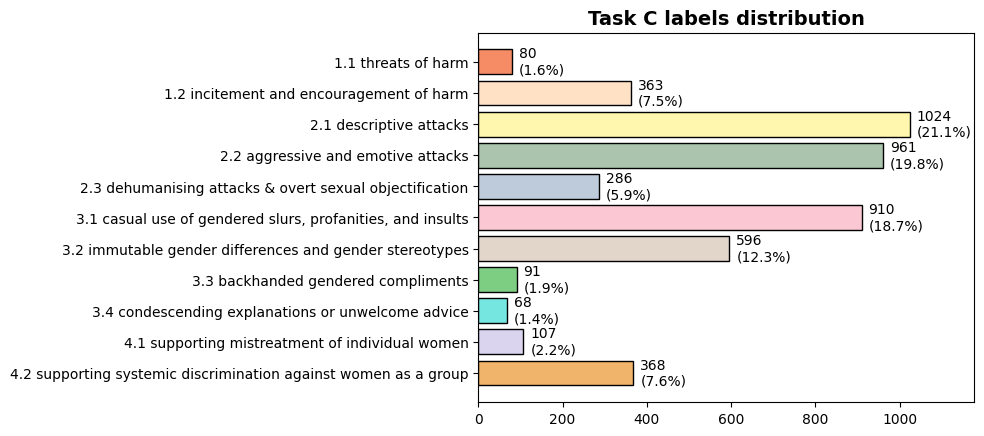

In [9]:
c_labels, c_counts = np.unique(edos_sexist['label_vector'], return_counts=True)
c_labels, c_counts = sorted(c_labels), c_counts[np.argsort(c_labels)]
c_sum = sum(c_counts)
fig, ax = plt.subplots()
bars = ax.barh(width=c_counts,
               y=c_labels,
               color=colors,
               edgecolor='black')
# format labels: value, percentage = value/sum
def bar_format(values):
    def my_format(value):
        val = int(round(value))
        return '{v:d}\n({p:.1f}%)'.format(v=val, p=val/c_sum*100)
    return my_format
ax.bar_label(bars, fmt=bar_format(c_counts),
             label_type='edge',
             padding=5)
ax.margins(x=0.15)
ax.invert_yaxis()
plt.title("Task C labels distribution", fontdict=dict(weight='bold', size=14))
plt.savefig('task_c_labels_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Sample for each label:

In [10]:
for label in c_labels:
    print('Label:', label)
    print(edos_sexist[edos_sexist['label_vector'] == label]['text'].sample(1).values, '\n')

Label: 1.1 threats of harm
["As a kid, I grew up in my teen years on the streets. She wouldn't have succeed in hitting more than twice before I beat the living hell out of her."] 

Label: 1.2 incitement and encouragement of harm
['There should be a cost to those who purposely lie about other politicians in order to defeat them. Old hag Feinstein should fry'] 

Label: 2.1 descriptive attacks
["This kind of protest makes sense to women because they spend their entire lives using their bodies to get whatever they want. It's all they know how to do. Logical arguments? Nah. I'll just take my clothes off and shout."] 

Label: 2.2 aggressive and emotive attacks
['she is a 24 carat cunt.'] 

Label: 2.3 dehumanising attacks & overt sexual objectification
["It's not his job to keep other guys away, it's her fucking job, and if she doesn't respect that he gotta get the fuck out. A billion pussy in the sea"] 

Label: 3.1 casual use of gendered slurs, profanities, and insults
['She’s either an atte

## **Data Splitting Distribution**

### Train, Dev, Test split distribution:

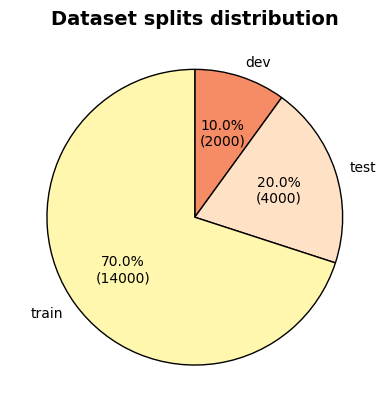

In [11]:
split_labels, split_counts = np.unique(edos['split'], return_counts=True)
plt.pie(split_counts,
        labels=split_labels,
        startangle=90,
        counterclock=False,
        wedgeprops=dict(edgecolor='black'),
        autopct=pie_autopct_format(edos['split'].value_counts()))
plt.title("Dataset splits distribution", fontdict=dict(weight='bold', size=14))
plt.savefig('dataset_splits_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## **Sentence Length Analysis**

### Max, min, mean, median, and standard deviation of sentence length of all data

In [12]:
edos['text_len'] = edos['text'].apply(lambda x: len(x))
edos['text_len'].astype(int)

edos['text_len'].describe()

count    20000.000000
mean       126.996200
std         63.256474
min          4.000000
25%         74.000000
50%        121.000000
75%        178.250000
max        250.000000
Name: text_len, dtype: float64

Sentence length histogram:

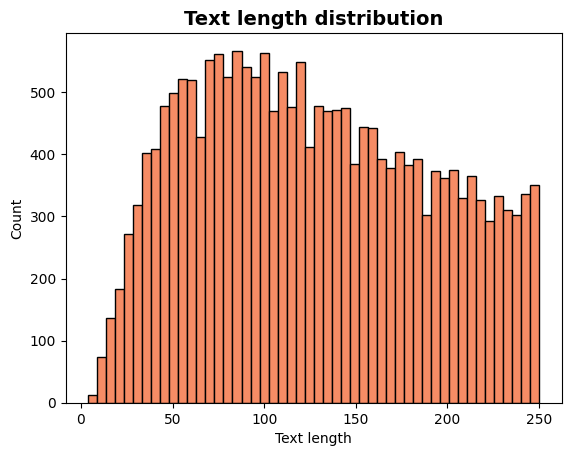

In [13]:
plt.hist(edos['text_len'], bins=50,
         edgecolor='black')
plt.title("Text length distribution", fontdict=dict(weight='bold', size=14))
plt.xlabel('Text length')
plt.ylabel('Count')
plt.savefig('text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
print('Number of samples with text length equal to min:', edos[edos['text_len']==edos['text_len'].min()].shape[0])
print('Number of samples with text length < 10:', edos[edos['text_len'] < 10].shape[0])
print('Number of samples with text length > 125:', edos[edos['text_len'] > 125].shape[0])
print('Number of samples with text length equal to max:', edos[edos['text_len']==edos['text_len'].max()].shape[0])

Number of samples with text length equal to min: 1
Number of samples with text length < 10: 23
Number of samples with text length > 125: 9568
Number of samples with text length equal to max: 63


Example of the longest sentence and the shortest sentence:

In [15]:
print('Shortest text:')
print(edos[edos['text_len'] == edos['text_len'].min()]['text'].sample(1).values, '\n')
print('Longest text:')
print(edos[edos['text_len'] == edos['text_len'].max()]['text'].sample(1).values)

Shortest text:
['Zits'] 

Longest text:
['The assassination of Archduke Franz Ferdinand of Austria,(shown here) heir presumptive to the Austro-Hungarian throne, and his wife Sophie, Duchess of Hohenberg, occurred on 28 June 1914 in Sarajevo. It was used as the pretext to start World War One.']


### Sentence length by each split description

In [16]:
edos.groupby('split')['text_len'].describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
dev,2000.0,125.430000,63.477349,7.0,74.0,119.0,176.0,250.0
test,4000.0,125.442750,63.820910,5.0,72.0,120.0,177.0,250.0
train,14000.0,127.663786,63.055376,4.0,75.0,122.0,179.0,250.0


### Sentence length by each task A label

In [17]:
edos.groupby('label_sexist')['text_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label_sexist,,,,,,,,
not sexist,15146.0,124.394890,63.302372,4.0,71.0,118.0,175.0,250.0
sexist,4854.0,135.113103,62.426448,9.0,83.0,132.0,188.0,250.0


Extract 10 shortest sentences for 'not sexist' label:

In [18]:
edos[edos['label_sexist'] == 'not sexist'].sort_values(by='text_len').head(10).to_csv('10 shortest not sexist samples.csv')

### Sentence length by each task B label

In [19]:
edos_sexist['text_len'] = edos_sexist['text'].apply(lambda x: len(x))
edos_sexist

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_18368\2283281652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edos_sexist['text_len'] = edos_sexist['text'].apply(lambda x: len(x))


,text,label_sexist,label_category,label_vector,split,text_len
rewire_id,,,,,,
sexism2022_english-7228,[USER] Leg day is easy. Hot girls who wear miniskirts get asked out.,sexist,3. animosity,3.3 backhanded gendered compliments,train,68
sexism2022_english-872,I get a new pussy every other week or whenever i want really. Didnt have to learn how to either from YouTube videos. Also PUAs dont get laid. At best they get 5/10 asian ladies after spending years pretending to be something they aren't. Its pathetic,sexist,2. derogation,2.3 dehumanising attacks & overt sexual objectification,train,250
sexism2022_english-3553,"I agree with that but at the same time I know myself well enough to say I can’t love a woman. The minute she begins to hit the wall and some hotter, younger women enters the picture, it’s time for impulse control because I’m going to want that.",sexist,2. derogation,2.1 descriptive attacks,dev,244
sexism2022_english-14992,O come on there's no way any men are attracted to her shes a pig🙄,sexist,2. derogation,2.3 dehumanising attacks & overt sexual objectification,train,65
sexism2022_english-13328,"democrats from Minnesota (leftist muzzie shithole) are the dumbest anti-americans there are. KLobuchar, one of the reps. is a dumb bitch who has a moronic position on the tax bill. Fuck this stupid woman",sexist,2. derogation,2.2 aggressive and emotive attacks,dev,203
...,...,...,...,...,...,...
sexism2022_english-17659,"This is easily the dumbest thing ever written. Hot pussy craves J. Todd Kincannon. It always has. It always will. I don't care if gross pussy doesn't like me. What do you think I am, some kind of psycho?",sexist,2. derogation,2.3 dehumanising attacks & overt sexual objectification,train,203
sexism2022_english-13737,"Recently some thots started advertizing their onlyfans on linkedin, i saw some posts of chat messages.",sexist,3. animosity,"3.1 casual use of gendered slurs, profanities, and insults",train,102
sexism2022_english-8065,"I wish yall understand what a burden it can be for a woman to get pregnant or to have sex. So keep your legs closed, you dirty slut. Nobody is forcing you to fuck unemployed men who don’t commit - that is 100% your choice.",sexist,2. derogation,2.2 aggressive and emotive attacks,train,222


In [20]:
edos_sexist.groupby('label_category')['text_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label_category,,,,,,,,
"1. threats, plans to harm and incitement",443.0,120.234763,63.519114,9.0,66.0,110.0,173.0,250.0
2. derogation,2271.0,135.432849,61.410181,12.0,85.0,133.0,187.0,250.0
3. animosity,1665.0,132.958559,63.119850,10.0,80.0,130.0,185.0,250.0
4. prejudiced discussions,475.0,155.012632,58.906597,14.0,113.0,157.0,205.5,250.0


### Sentence length by each task C label

In [21]:
edos_sexist.groupby('label_vector')['text_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label_vector,,,,,,,,
1.1 threats of harm,80.0,125.037500,55.474123,32.0,80.75,118.5,168.50,249.0
1.2 incitement and encouragement of harm,363.0,119.176309,65.180640,9.0,64.50,108.0,176.50,250.0
2.1 descriptive attacks,1024.0,144.484375,61.121770,21.0,93.75,143.0,197.00,249.0
2.2 aggressive and emotive attacks,961.0,127.940687,60.686744,12.0,78.00,123.0,174.00,250.0
2.3 dehumanising attacks & overt sexual objectification,286.0,128.199301,60.711617,27.0,78.00,119.5,178.75,250.0
"3.1 casual use of gendered slurs, profanities, and insults",910.0,127.373626,65.088963,10.0,72.00,122.5,182.00,250.0
3.2 immutable gender differences and gender stereotypes,596.0,140.612416,59.675333,20.0,92.00,135.0,191.00,250.0
3.3 backhanded gendered compliments,91.0,128.615385,59.243522,22.0,86.00,125.0,177.00,248.0
3.4 condescending explanations or unwelcome advice,68.0,146.426471,63.057736,29.0,95.75,152.0,194.00,250.0


Extract 10 shortest sentences for each label:

In [22]:
shortest_df = edos_sexist.groupby('label_vector').apply(lambda x: x.sort_values(by='text_len')[['text', 'label_sexist', 'label_category', 'split']].head(10))
shortest_df.to_csv('10 shortest samples each task C label.csv')
shortest_df

text   
label_vector                                                    rewire_id                                                                   
1.1 threats of harm                                             sexism2022_english-7329                  I'd love to fucking kick her ass  \
                                                                sexism2022_english-18782            No poppy? You deserve an acid attack.   
                                                                sexism2022_english-13254          This woman needs a rope around her neck   
                                                                sexism2022_english-3313    I would kill your mother to get a shot at you.   
                                                                sexism2022_english-9066   Stupid bitch.. I would’ve slapped tf out of her   
...                                                                                                                                   ...   
4.2 supporting systemic discrimination against women as a group sexism2022_english-2034               First and foremost, fire all women.   
                                                                sexism2022_english-16219           Don't pay attention to what women say.   
                                                                sexism2022_english-8735           She got her equal rights... And lefts 😂   
                                                                sexism2022_english-19085         This is why women should have no rights.   
                                                                sexism2022_english-10350   To female Bishops stop making fun of religion.   

                                                                                         label_sexist   
label_vector                                                    rewire_id                               
1.1 threats of harm                                             sexism2022_english-7329        sexist  \
                                                                sexism2022_english-18782       sexist   
                                                                sexism2022_english-13254       sexist   
                                                                sexism2022_english-3313        sexist   
                                                                sexism2022_english-9066        sexist   
...                                                                                               ...   
4.2 supporting systemic discrimination against women as a group sexism2022_english-2034        sexist   
                                                                sexism2022_english-16219       sexist   
                                                                sexism2022_english-8735        sexist   
                                                                sexism2022_english-19085       sexist   
                                                                sexism2022_english-10350       sexist   

                                                                                                                    label_category   
label_vector                                                    rewire_id                                                            
1.1 threats of harm                                             sexism2022_english-7329   1. threats, plans to harm and incitement  \
                                                                sexism2022_english-18782  1. threats, plans to harm and incitement   
                                                                sexism2022_english-13254  1. threats, plans to harm and incitement   
                                                                sexism2022_english-3313   1. threats, plans to harm and incitement   
                                                                sexism2022_english-9066   1. threats, plans to harm and incitemen

## **Word Count Analysis**

### Word count of all data description

In [23]:
import preprocess

Import English dictionary

In [24]:
english_words = set()
with open('../wiki_dict.txt', 'r', encoding='utf-8') as f:
    for line in f:
        english_words.add(line.strip())
len(english_words)

2518927

In [25]:
def tokenize(text):
    return preprocess.tokenize(text, vocab_set=english_words)

print(edos['text'][539])
print(tokenize(edos['text'][539]))

▶Anonymous 06/20/18 (Wed) 14:05:56 0f806a (15) No.1831793 =NEWS= World Cup reporter sexually assaulted during live broadcast www.foxnews.com/entertainment/2018/06/20/female-world-cup-reporter-sexually-assaulted-during-live-broadcast.html
['▶', 'anonymous', '06/20', '/', '18', '(', 'wed', ')', '14:05', '56', '0f806a', '(', '15', ')', 'no', '.', '1831793', 'news', 'world', 'cup', 'reporter', 'sexually', 'assaulted', 'during', 'live', 'broadcast', 'url']


In [26]:
edos['word_count'] = edos['text'].apply(lambda x: len(tokenize(x)))
edos['word_count'].astype(int)

edos['word_count'].describe()

count    20000.000000
mean        27.296200
std         13.666726
min          1.000000
25%         16.000000
50%         26.000000
75%         38.000000
max         66.000000
Name: word_count, dtype: float64

Histogram of word count:

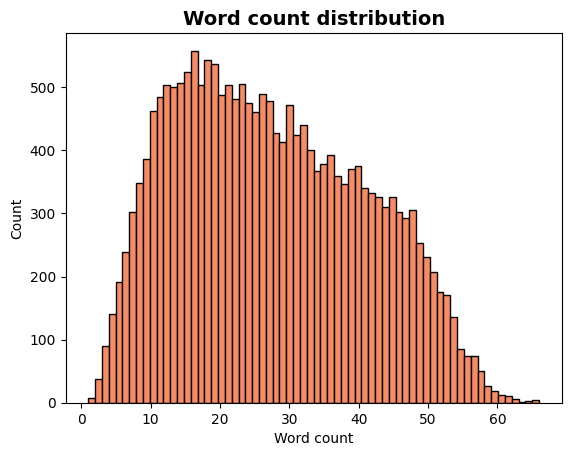

In [27]:
plt.hist(edos['word_count'], bins=edos['word_count'].max(),
            edgecolor='black')
plt.title("Word count distribution", fontdict=dict(weight='bold', size=14))
plt.xlabel('Word count')
plt.ylabel('Count')
plt.savefig('word_count_distribution.png')
plt.show()

### Word count by each split description

In [28]:
edos.groupby('split')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
dev,2000.0,26.977500,13.741885,1.0,16.0,25.0,37.0,63.0
test,4000.0,27.009500,13.789868,1.0,16.0,25.0,38.0,66.0
train,14000.0,27.423643,13.619539,1.0,16.0,26.0,38.0,66.0


### Word count by each task A label

In [29]:
edos.groupby('label_sexist')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
label_sexist,,,,,,,,
not sexist,15146.0,26.743563,13.672744,1.0,15.0,25.0,37.0,66.0
sexist,4854.0,29.020602,13.504706,2.0,18.0,28.0,40.0,66.0


In [30]:
# shortest and longest texts for each label
for label in edos['label_sexist'].unique():
    print('Label:', label)
    print('Shortest text:', edos[edos['label_sexist'] == label].sort_values(by='word_count').head(1)['text'].values)
    print('Longest text:', edos[edos['label_sexist'] == label].sort_values(by='word_count', ascending=False).head(1)['text'].values, '\n')


Label: not sexist
Shortest text: ['wabbits']
Longest text: ['"Nit(s) is a common name of a head lice (louse) egg. A female louse can lay up to 10 nits per day, and it usually takes about 7-10 days for them to hatch. If left untreated in a 30-day lifespan a louse can lay up to 100 eggs in her lifetime." [URL]'] 

Label: sexist
Shortest text: ['Hoochie mama']
Longest text: ["Gjdm, I need to stop being a bitch and talk to woman I like during the day. Heck, there's a girl at my gym who I've been dying to strike up a conversation with but I always make an excuse in my head not to. F that . Even it's just 'hi' I'm doing it."] 



### Word count by each task B label

In [31]:
edos_sexist['word_count'] = edos_sexist['text'].apply(lambda x: len(tokenize(x)))

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_18368\3223232917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edos_sexist['word_count'] = edos_sexist['text'].apply(lambda x: len(tokenize(x)))


In [32]:
edos_sexist.groupby('label_category')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
label_category,,,,,,,,
"1. threats, plans to harm and incitement",443.0,26.510158,13.848951,3.0,15.0,25.0,38.0,66.0
2. derogation,2271.0,29.021136,13.259540,2.0,18.0,28.0,39.0,65.0
3. animosity,1665.0,28.763363,13.841930,2.0,17.0,27.0,40.0,66.0
4. prejudiced discussions,475.0,32.261053,12.536161,3.0,23.0,32.0,42.0,62.0


In [33]:
# shortest and longest texts for each label
for label in sorted(edos_sexist['label_category'].unique()):
    print('Label:', label)
    print('Shortest text:', edos_sexist[edos_sexist['label_category'] == label].sort_values(by='word_count').head(1)['text'].values)
    print('Longest text:', edos_sexist[edos_sexist['label_category'] == label].sort_values(by='word_count', ascending=False).head(1)['text'].values, '\n')

Label: 1. threats, plans to harm and incitement
Shortest text: ['Hang her.']
Longest text: ["I would just start fucking her!! What's your problem, bro? You don't ask, you just do it!! In my 42 years on this earth I've never had a female that wasn't a relative sleep over at my crib/pad and not give me some pussy!! You are simping big time!!"] 

Label: 2. derogation
Shortest text: ['Hoochie mama']
Longest text: ["ITT: 1. She's not that hot. I would not bang her. I know hotter women. 2. She's a bitch. I would not bang her, out of principle. Because I only bang girls with *inner beauty*. 3. Of course, she get's hit on. She's just saying that she doesn't."] 

Label: 3. animosity
Shortest text: ['Worthless bitch']
Longest text: ["Gjdm, I need to stop being a bitch and talk to woman I like during the day. Heck, there's a girl at my gym who I've been dying to strike up a conversation with but I always make an excuse in my head not to. F that . Even it's just 'hi' I'm doing it."] 

Label: 4. pr

### Word count by each task C label

In [34]:
edos_sexist.groupby('label_vector')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
label_vector,,,,,,,,
1.1 threats of harm,80.0,28.762500,12.471988,8.0,19.00,27.0,38.00,57.0
1.2 incitement and encouragement of harm,363.0,26.013774,14.101931,3.0,14.00,24.0,37.00,66.0
2.1 descriptive attacks,1024.0,30.511719,13.210450,4.0,20.00,30.0,41.00,63.0
2.2 aggressive and emotive attacks,961.0,27.718002,13.200481,2.0,17.00,27.0,38.00,65.0
2.3 dehumanising attacks & overt sexual objectification,286.0,28.062937,13.128096,5.0,17.25,26.0,38.00,58.0
"3.1 casual use of gendered slurs, profanities, and insults",910.0,27.582418,14.171095,2.0,15.25,27.0,40.00,66.0
3.2 immutable gender differences and gender stereotypes,596.0,30.380872,13.124135,3.0,20.00,29.5,40.00,60.0
3.3 backhanded gendered compliments,91.0,28.241758,13.514881,5.0,18.00,26.0,38.00,57.0
3.4 condescending explanations or unwelcome advice,68.0,31.088235,14.522998,5.0,18.75,29.5,42.00,66.0


In [35]:
# shortest and longest texts for each label
for label in sorted(edos_sexist['label_vector'].unique()):
    print('Label:', label)
    print('Shortest text:', edos_sexist[edos_sexist['label_vector'] == label].sort_values(by='word_count').head(1)['text'].values)
    print('Longest text:', edos_sexist[edos_sexist['label_vector'] == label].sort_values(by='word_count', ascending=False).head(1)['text'].values, '\n')

Label: 1.1 threats of harm
Shortest text: ["I'd love to fucking kick her ass"]
Longest text: ['Got no response to that. Oh great the French view is what exactly? hes a black guy too. Holy shit there is nothing about this post that doesnt want me to punch her fat American face. Yes i assume shes fat, thats what you get from stupid assumptions.'] 

Label: 1.2 incitement and encouragement of harm
Shortest text: ['Hang her.']
Longest text: ["I would just start fucking her!! What's your problem, bro? You don't ask, you just do it!! In my 42 years on this earth I've never had a female that wasn't a relative sleep over at my crib/pad and not give me some pussy!! You are simping big time!!"] 

Label: 2.1 descriptive attacks
Shortest text: ['Israeli women fuck donkeys']
Longest text: ['1. They’re looking to see if other women want you (social proof) so they don’t seem weird if they want you. 2. If you’re a virgin, lie. Fake it till you make it. The girl who I lost my virginity to thought I had 

## **Word Analysis**

### Get word frequency of all data

Get all words

In [36]:
# get all texts id for every text that contains word
def get_text_ids(word):
    return edos[edos['tokenized_text'].apply(lambda x: word in x)].index.values

In [37]:
words = pd.DataFrame(columns=['word'])

edos['tokenized_text'] = edos['text'].apply(lambda x: tokenize(x))
words['word'] = edos['tokenized_text'].explode().unique()

words

,word
0,in
1,nigeria
2,","
3,if
4,you
...,...
25316,selflessly
25317,👆
25318,idol
25319,finalist


In [38]:
words.sort_values(by='word', ascending=True).reset_index(drop=True)

,word
0,!
1,""""
2,#
3,##if
4,#cw2
...,...
25316,🦇
25317,🦊
25318,🧟‍♀
25319,🧟‍♂


Get word frequency

In [39]:
from nltk import FreqDist

word_freq = FreqDist(edos['tokenized_text'].explode())
words['freq'] = words['word'].apply(lambda x: word_freq.get(x))

In [40]:
# most frequent words including stopwords
words.sort_values(by='freq', ascending=False).reset_index(drop=True).head(20)

,word,freq
0,.,27033
1,the,14220
2,",",14208
3,a,12455
4,to,12197
5,is,11284
6,i,9557
7,and,9194
8,you,8490
9,not,7507


In [41]:
# most frequent words excluding stopwords
from nltk.corpus import stopwords
from string import punctuation

stop_words_punct = set(stopwords.words('english'))
stop_words_punct.update(punctuation)

# remove stopwords and punctuation
words['word'] = words['word'].apply(lambda x: x if (x not in stop_words_punct) and (not str(x).isnumeric()) else None)
words.dropna(inplace=True)
words['freq'] = words['word'].apply(lambda x: word_freq.get(x))

words.sort_values(by='freq', ascending=False).reset_index(drop=True).head(20)

,word,freq
0,women,4334
1,url,3414
2,like,2429
3,would,2063
4,get,1707
5,woman,1643
6,men,1464
7,user,1363
8,one,1145
9,girls,1135


In [42]:
words['freq'].describe()

count    24902.000000
mean         9.806401
std         60.593327
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       4334.000000
Name: freq, dtype: float64

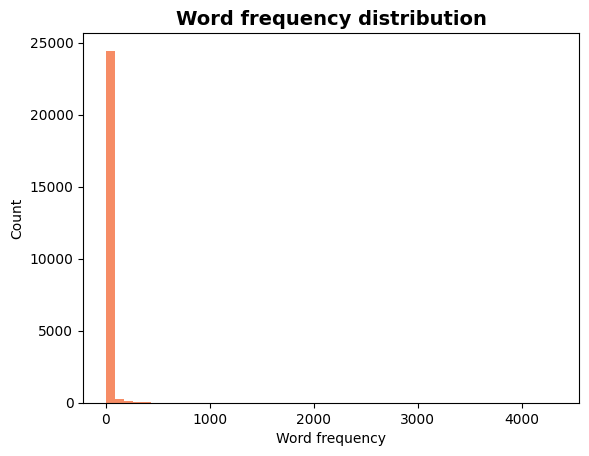

In [43]:
plt.hist(words['freq'], bins=50)
plt.title("Word frequency distribution", fontdict=dict(weight='bold', size=14))
plt.xlabel('Word frequency')
plt.ylabel('Count')
plt.savefig('word_frequency_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
print("Number of words with frequency = 1:", words[words['freq'] == 1].shape[0])
print("Number of words with frequency < 10:", words[words['freq'] < 10].shape[0])
print("Number of words with frequency > 100:", words[words['freq'] > 100].shape[0])
print("Number of words with frequency > 1000:", words[words['freq'] > 1000].shape[0])

Number of words with frequency = 1: 12408
Number of words with frequency < 10: 21462
Number of words with frequency > 100: 388
Number of words with frequency > 1000: 13


Get word frequency of each label

In [45]:
edos_sexist['tokenized_text'] = edos_sexist['text'].apply(lambda x: tokenize(x))
word_freq_sexist = FreqDist(edos_sexist['tokenized_text'].explode())

words['freq_sexist'] = words['word'].apply(lambda x: word_freq_sexist.get(x)).fillna(0)
words['freq_sexist'] = words['freq_sexist'].astype(int)
words['freq_not_sexist'] = words['freq'] - words['freq_sexist']

C:\Users\Minh Ha\AppData\Local\Temp\ipykernel_18368\1519064831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edos_sexist['tokenized_text'] = edos_sexist['text'].apply(lambda x: tokenize(x))


In [46]:
words.sort_values(by='freq_sexist', ascending=False).reset_index(drop=True).head(20)

,word,freq,freq_sexist,freq_not_sexist
0,women,4334,1877,2457
1,like,2429,697,1732
2,men,1464,658,806
3,bitch,591,577,14
4,get,1707,537,1170
5,woman,1643,535,1108
6,would,2063,529,1534
7,url,3414,507,2907
8,female,951,326,625
9,fuck,1073,326,747


In [47]:
words[words['freq_sexist'] > 0]['freq_sexist'].describe()

count    10914.000000
mean         5.781473
std         28.312850
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1877.000000
Name: freq_sexist, dtype: float64

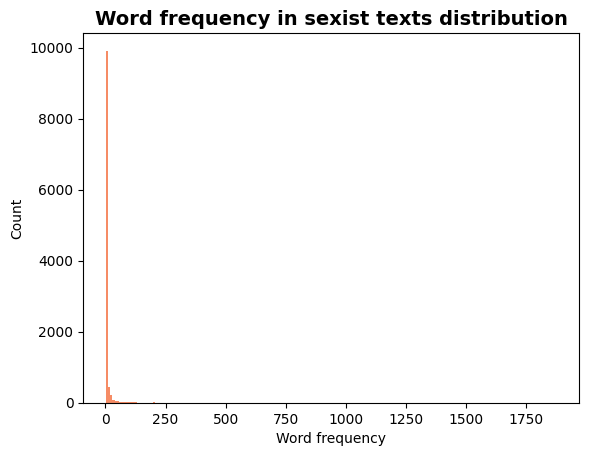

In [48]:
plt.hist(words[words['freq_sexist'] > 0]['freq_sexist'], bins=200)
plt.title("Word frequency in sexist texts distribution", fontdict=dict(weight='bold', size=14))
plt.xlabel('Word frequency')
plt.ylabel('Count')
plt.savefig('word_frequency_sexist_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
print("Number of words in sexist text with frequency = 1:", words[words['freq_sexist'] == 1].shape[0])
print("Number of words in sexist text with frequency < 10:", words[words['freq_sexist'] < 10].shape[0])
print("Number of words in sexist text with frequency > 100:", words[words['freq_sexist'] > 100].shape[0])
print("Number of words in sexist text with frequency > 1000:", words[words['freq_sexist'] > 1000].shape[0])

Number of words in sexist text with frequency = 1: 5844
Number of words in sexist text with frequency < 10: 23817
Number of words in sexist text with frequency > 100: 76
Number of words in sexist text with frequency > 1000: 1


### Create word cloud

In [50]:
from wordcloud import WordCloud

def show_word_cloud(text: any, freq: any, title: str):
    text = np.array(text, dtype=str)
    freq = np.array(freq, dtype=int)
    wordcloud = WordCloud(width=800, 
                          height=400, 
                          background_color='white', 
                          collocations=False,
                          relative_scaling=0.5,
                          max_words=200,
                          ).generate_from_frequencies(dict(zip(text, freq)))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontdict=dict(weight='bold', size=14))
    plt.savefig(title.replace(' ', '_').lower() + '.png', dpi=300, bbox_inches='tight') # lower title and replace spaces with underscores
    plt.show()

Word cloud of all data

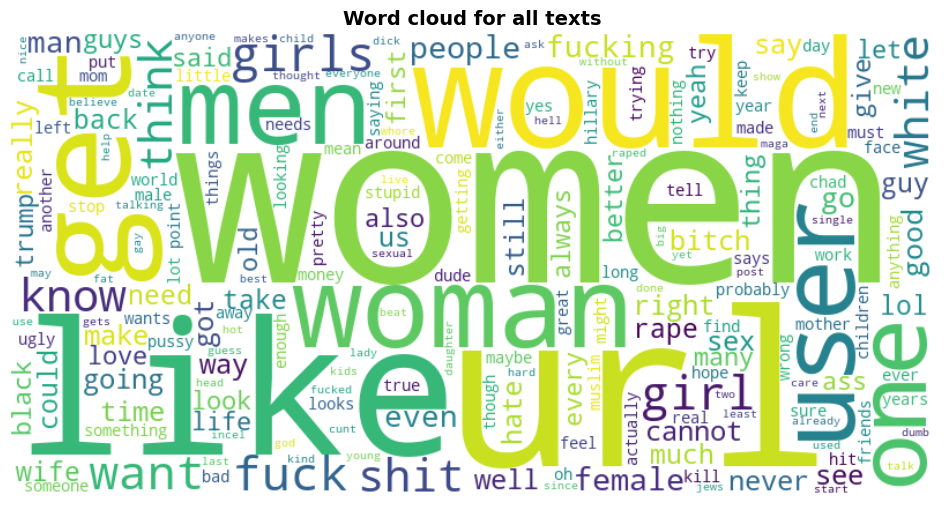

In [51]:
words = words.sort_values(by='freq', ascending=False)
show_word_cloud(words['word'], words['freq'], 'Word cloud for all texts')

Word cloud of most frequent words of sexist label

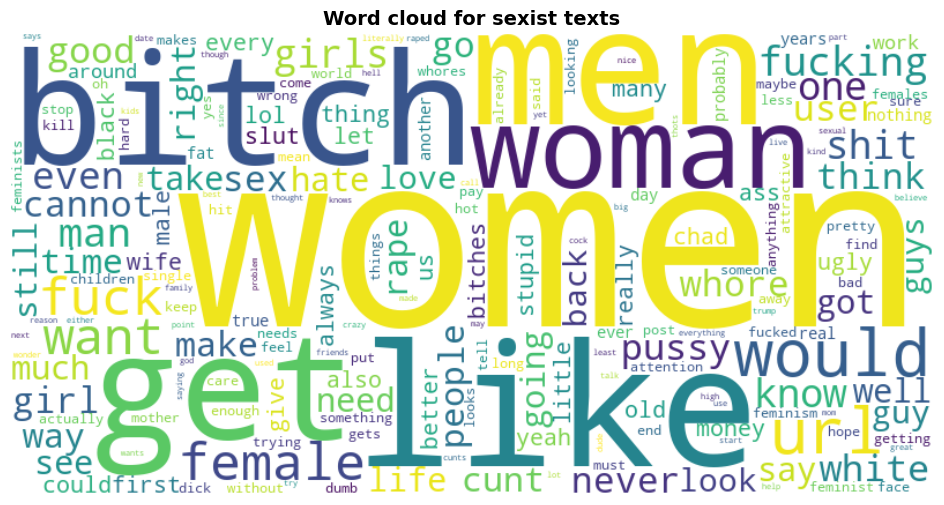

In [52]:
words = words.sort_values(by='freq_sexist', ascending=False)
show_word_cloud(words['word'], words['freq_sexist'], 'Word cloud for sexist texts')

Word cloud of most frequent words of not sexist label

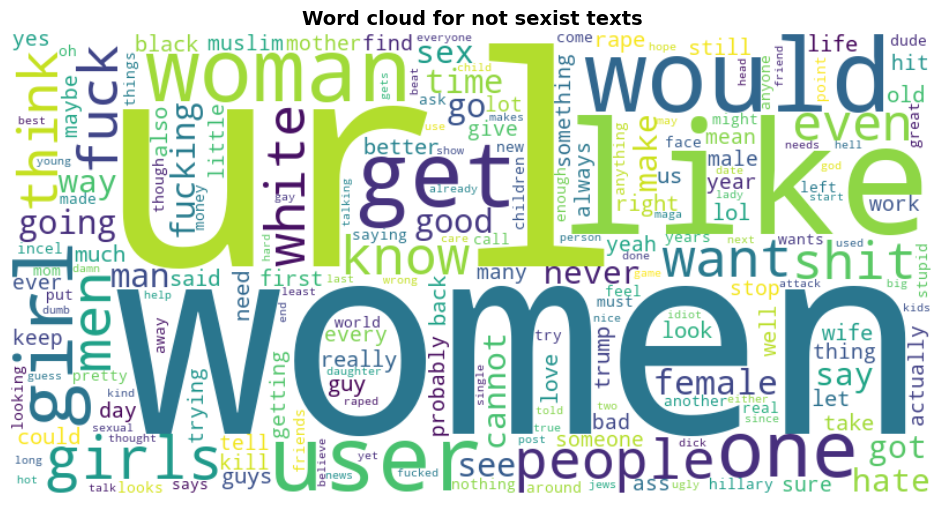

In [53]:
words = words.sort_values(by='freq_not_sexist', ascending=True)
show_word_cloud(words['word'], words['freq_not_sexist'], 'Word cloud for not sexist texts')

### Emoji count

In [54]:
import emoji

words['is_emoji'] = words['word'].apply(lambda x: emoji.is_emoji(x))
emoji_all_data = words[words['is_emoji'] == True].sort_values(by='freq', ascending=False)[['word', 'freq', 'freq_sexist', 'freq_not_sexist']].reset_index(drop=True)
emoji_all_data

,word,freq,freq_sexist,freq_not_sexist
0,😂,174,46,128
1,🤣,38,14,24
2,🤔,37,5,32
3,😁,22,5,17
4,😊,19,0,19
...,...,...,...,...
178,🤯,1,0,1
179,✅,1,0,1
180,😩,1,0,1
181,😧,1,0,1


In [55]:
words[(words['is_emoji'] == True) & (words['freq_sexist'] > 0)].sort_values(by='freq_sexist', ascending=False).reset_index(drop=True).head(10)

,word,freq,freq_sexist,freq_not_sexist,is_emoji
0,😂,174,46,128,True
1,🤣,38,14,24,True
2,♥,8,5,3,True
3,🤔,37,5,32,True
4,😁,22,5,17,True
5,🙄,15,5,10,True
6,🤡,5,4,1,True
7,😜,5,3,2,True
8,🖕,5,3,2,True
9,😀,8,3,5,True


In [56]:
emoji_all_data['text_ids'] = emoji_all_data['word'].apply(lambda x: get_text_ids(x))
emoji_all_data['example_text'] = emoji_all_data['text_ids'].apply(lambda x: edos.loc[x[0], 'text'])
emoji_all_data[['word', 'freq', 'freq_sexist', 'freq_not_sexist', 'example_text']].head(10)

,word,freq,freq_sexist,freq_not_sexist,example_text
0,😂,174,46,128,i don't wanna suck any beef curtain flaps 😂
1,🤣,38,14,24,"Aw, what's wrong nigger? You don't like your sheboon exposed for the savage she is? 🤣"
2,🤔,37,5,32,Why does she have to be white? Do blackcels hate black females or something ? 🤔
3,😁,22,5,17,He sure took her for a ride. 😁
4,😊,19,0,19,My mom does 😊
5,😄,17,2,15,Lol sounds like me. I don't normally play the lottery but one yr my mom bought us all each 5 tickets for Christmas. I got nothing until my last ticket and it was a $5 prize 😄😄😄
6,🇺🇸,16,0,16,"Pray Always🇺🇸🇮🇱‏ [USER] Or we’ll rape your women and children? Migrant Urges Germans, Austrians To Give Refugees ""Their Homes and Money"" | Zero Hedge [URL] …"
7,👍,16,1,15,"👍YES she needs to and she won't shy away form it , more power to her , i like her spunk !! 🌺💐🤗😘❤️️"
8,🙄,15,5,10,O come on there's no way any men are attracted to her shes a pig🙄
9,👌,14,0,14,Will be mentioning this to her next time we meet! Thanks twitter one can always find something good out of a bad situation eh👌


In [57]:
print('Most frequent emoji and example text:')
emoji_all_data.sort_values(by='freq', ascending=False)[['word', 'freq', 'example_text']].reset_index(drop=True).head(10)

Most frequent emoji and example text:


,word,freq,example_text
0,😂,174,i don't wanna suck any beef curtain flaps 😂
1,🤣,38,"Aw, what's wrong nigger? You don't like your sheboon exposed for the savage she is? 🤣"
2,🤔,37,Why does she have to be white? Do blackcels hate black females or something ? 🤔
3,😁,22,He sure took her for a ride. 😁
4,😊,19,My mom does 😊
5,😄,17,Lol sounds like me. I don't normally play the lottery but one yr my mom bought us all each 5 tickets for Christmas. I got nothing until my last ticket and it was a $5 prize 😄😄😄
6,🇺🇸,16,"Pray Always🇺🇸🇮🇱‏ [USER] Or we’ll rape your women and children? Migrant Urges Germans, Austrians To Give Refugees ""Their Homes and Money"" | Zero Hedge [URL] …"
7,👍,16,"👍YES she needs to and she won't shy away form it , more power to her , i like her spunk !! 🌺💐🤗😘❤️️"
8,🙄,15,O come on there's no way any men are attracted to her shes a pig🙄
9,👌,14,Will be mentioning this to her next time we meet! Thanks twitter one can always find something good out of a bad situation eh👌


In [58]:
print("Most frequent emoji in sexist texts and example text:")
emoji_all_data.sort_values(by='freq_sexist', ascending=False)[['word', 'freq_sexist', 'example_text']].reset_index(drop=True).head(10)

Most frequent emoji in sexist texts and example text:


,word,freq_sexist,example_text
0,😂,46,i don't wanna suck any beef curtain flaps 😂
1,🤣,14,"Aw, what's wrong nigger? You don't like your sheboon exposed for the savage she is? 🤣"
2,🤔,5,Why does she have to be white? Do blackcels hate black females or something ? 🤔
3,😁,5,He sure took her for a ride. 😁
4,♥,5,"[USER] I am in love with her coat, such a beautiful colour - fun & modern cut, whilst staying classically elegant ♥️"
5,🙄,5,O come on there's no way any men are attracted to her shes a pig🙄
6,🤡,4,Cardi b aint shit she should be in jail smh clown lookin ass bitch 🤡
7,😆,3,"layin pipe lmfao, 😆 😆 😆 that pussy looking, milk toast mother fucker coudln't lay pipe if his name was Roto Rooter"
8,🖕,3,"""for unknown reasons"" Lol I solved this one, the reason is because she was WHITE. Ok, another white targeted based on race, nothing to see here. Now get back on twitter and search for people telling the truth on islam 🖕"
9,😀,3,"[USER] well, as there's no #finance tag.. I would leave it open.. if not, I'd pick #lifestyle...> Money makes the world go round, so? 😀 Btw: we prefer #Brzz instead of BruXeLles 😋"


In [59]:
print("Most frequent emoji in not sexist texts and example text:")
emoji_all_data.sort_values(by='freq_not_sexist', ascending=False)[['word', 'freq_not_sexist', 'example_text']].reset_index(drop=True).head(10)

Most frequent emoji in not sexist texts and example text:


,word,freq_not_sexist,example_text
0,😂,128,i don't wanna suck any beef curtain flaps 😂
1,🤔,32,Why does she have to be white? Do blackcels hate black females or something ? 🤔
2,🤣,24,"Aw, what's wrong nigger? You don't like your sheboon exposed for the savage she is? 🤣"
3,😊,19,My mom does 😊
4,😁,17,He sure took her for a ride. 😁
5,🇺🇸,16,"Pray Always🇺🇸🇮🇱‏ [USER] Or we’ll rape your women and children? Migrant Urges Germans, Austrians To Give Refugees ""Their Homes and Money"" | Zero Hedge [URL] …"
6,😄,15,Lol sounds like me. I don't normally play the lottery but one yr my mom bought us all each 5 tickets for Christmas. I got nothing until my last ticket and it was a $5 prize 😄😄😄
7,👍,15,"👍YES she needs to and she won't shy away form it , more power to her , i like her spunk !! 🌺💐🤗😘❤️️"
8,👌,14,Will be mentioning this to her next time we meet! Thanks twitter one can always find something good out of a bad situation eh👌
9,😠,11,I despise the woman who wrote this article bashing Ivanka Trump. Please read this and send her a message via Twitter telling her how you hate it too. [URL] Amanda Carpenter [URL] 😨😈😠


Save emoji dataframe to csv file

In [60]:
emoji_all_data.to_csv('emoji_all_data.csv', index=False)

## **CountVectorizer and `chi2` score**

### CountVectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    ngram_range=(1, 1), # trigram
    analyzer='word', # features made of words
    stop_words=list(stop_words_punct),
    lowercase=False,
    tokenizer=tokenize,
)
X = vectorizer.fit_transform(edos['text'])
vectorizer.get_feature_names_out()

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'shall', 'would'] not in stop_words.
  warnings.warn(


array(['##if', '#cw2', '(516)', ..., '🧟\u200d♀', '🧟\u200d♂', '🧠'],
      dtype=object)

In [62]:
X

<20000x25155 sparse matrix of type '<class 'numpy.int64'>'
	with 235423 stored elements in Compressed Sparse Row format>

### `chi2` score

In [63]:
from sklearn.feature_selection import chi2

chi2_scores = chi2(X, np.array(edos['label_sexist']))

features = pd.DataFrame(columns=['word', 'chi2_score'])
features['word'] = vectorizer.get_feature_names_out()
features['chi2_score'] = chi2_scores[0]
features

,word,chi2_score
0,##if,0.320481
1,#cw2,0.320481
2,(516),0.320481
3,(8,3.120313
4,/8,0.320481
...,...,...
25150,🦇,0.320481
25151,🦊,0.320481
25152,🧟‍♀,0.640961
25153,🧟‍♂,0.640961


In [64]:
features.shape, words.shape

((25155, 2), (24902, 5))

Merge 2 dataframes

In [65]:
# words.drop(columns=['chi2_scores'], inplace=True)
words = words.merge(features, on='word', how='outer')
words

,word,freq,freq_sexist,freq_not_sexist,is_emoji,chi2_score
0,pur,1.0,1.0,0.0,False,3.120313
1,dismemberment,1.0,1.0,0.0,False,3.120313
2,betabucks,1.0,1.0,0.0,False,3.120313
3,proverb,1.0,1.0,0.0,False,3.120313
4,braying,1.0,1.0,0.0,False,3.120313
...,...,...,...,...,...,...
25150,96,NaN,NaN,NaN,NaN,0.134079
25151,97,NaN,NaN,NaN,NaN,1.281923
25152,98,NaN,NaN,NaN,NaN,0.640961
25153,99,NaN,NaN,NaN,NaN,0.211401


In [66]:
words[words.isnull().any(axis=1)]

,word,freq,freq_sexist,freq_not_sexist,is_emoji,chi2_score
24902,0,NaN,NaN,NaN,NaN,6.229023
24903,00,NaN,NaN,NaN,NaN,0.640961
24904,000,NaN,NaN,NaN,NaN,1.281923
24905,00001,NaN,NaN,NaN,NaN,0.320481
24906,007,NaN,NaN,NaN,NaN,0.001160
...,...,...,...,...,...,...
25150,96,NaN,NaN,NaN,NaN,0.134079
25151,97,NaN,NaN,NaN,NaN,1.281923
25152,98,NaN,NaN,NaN,NaN,0.640961
25153,99,NaN,NaN,NaN,NaN,0.211401


In [67]:
words.dropna(inplace=True)

In [68]:
words.sort_values(by='chi2_score', ascending=False).reset_index(drop=True).head(20)

,word,freq,freq_sexist,freq_not_sexist,is_emoji,chi2_score
0,bitch,591.0,577.0,14.0,False,1730.540692
1,women,4334.0,1877.0,2457.0,False,854.725669
2,pussy,250.0,224.0,26.0,False,580.533909
3,whore,207.0,197.0,10.0,False,566.126961
4,cunt,196.0,187.0,9.0,False,539.664231
5,bitches,118.0,115.0,3.0,False,343.890048
6,men,1464.0,658.0,806.0,False,340.493873
7,slut,123.0,109.0,14.0,False,277.099631
8,whores,79.0,75.0,4.0,False,214.644166
9,thots,58.0,57.0,1.0,False,172.831343


### Word length

In [69]:
words['len'] = words['word'].apply(lambda x: len(x))
words.sort_values(by='len', ascending=False).reset_index(drop=True).head(20)

,word,freq,freq_sexist,freq_not_sexist,is_emoji,chi2_score,len
0,oooooooooooooooooooooool,1.0,0.0,1.0,False,0.320481,24
1,raaaaaavvvvvvinnnnnggggg,1.0,0.0,1.0,False,0.320481,24
2,hahaahahhhhahahahhhaa,1.0,0.0,1.0,False,0.320481,21
3,hahahahahahahahahaha,2.0,2.0,0.0,False,6.240626,20
4,mischaracterization,1.0,1.0,0.0,False,3.120313,19
5,alkjtlkjafdlkdaflkj,1.0,0.0,1.0,False,0.320481,19
6,oversimplification,1.0,0.0,1.0,False,0.320481,18
7,ssssssssssshadilay,1.0,1.0,0.0,False,3.120313,18
8,feeeeeeeeeeeelings,1.0,1.0,0.0,False,3.120313,18
9,disproportionately,1.0,0.0,1.0,False,0.320481,18


In [70]:
words['len'].describe()

count    24902.000000
mean         6.930287
std          2.470459
min          1.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         24.000000
Name: len, dtype: float64

Correlation between word length, frequency and `chi2` score

In [71]:
words[['freq', 'freq_sexist', 'freq_not_sexist', 'chi2_score', 'len']].corr()

,freq,freq_sexist,freq_not_sexist,chi2_score,len
freq,1.000000,0.933274,0.987631,0.323695,-0.094555
freq_sexist,0.933274,1.000000,0.865414,0.530709,-0.079310
freq_not_sexist,0.987631,0.865414,1.000000,0.219888,-0.097286
chi2_score,0.323695,0.530709,0.219888,1.000000,-0.021536
len,-0.094555,-0.079310,-0.097286,-0.021536,1.000000


### Words not in English dictionary

Select words not in English dictionary

In [72]:
words['found'] = words['word'].apply(lambda x: x in english_words)
words[(words['found'] == False) & (words['is_emoji'] == False)].reset_index(drop=True)

,word,freq,freq_sexist,freq_not_sexist,is_emoji,chi2_score,len,found
0,betabucks,1.0,1.0,0.0,False,3.120313,9,False
1,creampied,1.0,1.0,0.0,False,3.120313,9,False
2,muthafuck,1.0,1.0,0.0,False,3.120313,9,False
3,mostt,1.0,1.0,0.0,False,3.120313,5,False
4,ininity,1.0,1.0,0.0,False,3.120313,7,False
...,...,...,...,...,...,...,...,...
2559,wife's,37.0,7.0,30.0,False,0.576431,6,False
2560,cucks,46.0,15.0,31.0,False,1.740269,5,False
2561,woman's,61.0,18.0,43.0,False,0.910659,7,False
2562,women's,120.0,45.0,75.0,False,11.427815,7,False


In [73]:
for word in words[(words['found'] == False) & (words['is_emoji'] == False)]['word']:
    # if word not contains any alphabetic character, delete it
    if not any(c.isalpha() for c in word):
        words.drop(words[words['word'] == word].index, inplace=True)
        continue
    # if word ends with "'s" and the word without "'s" is in english words, delete it
    if word.endswith("'s") and word[:-2] in english_words:
        words.drop(words[words['word'] == word].index, inplace=True)
        continue
words[(words['found'] == False) & (words['is_emoji'] == False)].reset_index(drop=True)

,word,freq,freq_sexist,freq_not_sexist,is_emoji,chi2_score,len,found
0,betabucks,1.0,1.0,0.0,False,3.120313,9,False
1,creampied,1.0,1.0,0.0,False,3.120313,9,False
2,muthafuck,1.0,1.0,0.0,False,3.120313,9,False
3,mostt,1.0,1.0,0.0,False,3.120313,5,False
4,ininity,1.0,1.0,0.0,False,3.120313,7,False
...,...,...,...,...,...,...,...,...
1953,ausfam,25.0,4.0,21.0,False,0.930279,6,False
1954,libtards,25.0,3.0,22.0,False,2.047818,8,False
1955,:d,28.0,0.0,28.0,False,8.973458,2,False
1956,cucks,46.0,15.0,31.0,False,1.740269,5,False


In [74]:
not_found_words = words[(words['found'] == False) & (words['is_emoji'] == False)][['word', 'freq', 'freq_sexist', 'freq_not_sexist', 'chi2_score']].reset_index(drop=True)
not_found_words

,word,freq,freq_sexist,freq_not_sexist,chi2_score
0,betabucks,1.0,1.0,0.0,3.120313
1,creampied,1.0,1.0,0.0,3.120313
2,muthafuck,1.0,1.0,0.0,3.120313
3,mostt,1.0,1.0,0.0,3.120313
4,ininity,1.0,1.0,0.0,3.120313
...,...,...,...,...,...
1953,ausfam,25.0,4.0,21.0,0.930279
1954,libtards,25.0,3.0,22.0,2.047818
1955,:d,28.0,0.0,28.0,8.973458
1956,cucks,46.0,15.0,31.0,1.740269


Get 1 example text containing words not in English dictionary and get all texts' id containing words not in English dictionary

In [75]:
not_found_words['text_ids'] = not_found_words['word'].apply(lambda x: get_text_ids(x))
not_found_words['example_text'] = not_found_words['text_ids'].apply(lambda x: edos.loc[x[0]]['text'] if len(x) > 0 else None)
not_found_words[['word', 'freq', 'chi2_score', 'example_text']].reset_index(drop=True)

,word,freq,chi2_score,example_text
0,betabucks,1.0,3.120313,"aww you could have pumped and dumped her. at least you took the 2nd best option, anything but betabucks"
1,creampied,1.0,3.120313,"Yeah, my wife has 7 kids by 9 different men, got creampied by 50, spitroasted by 12 pairs, and is in an open marriage with me, but she comes home to me every night. So in the end, who wins?"
2,muthafuck,1.0,3.120313,.....im wiggapriveledge yo git ti fuck oota here yo niggapriveledge muthafuck ya on ma turf ya all pay me ho.
3,mostt,1.0,3.120313,In my experience women don't recommend guys to their friends. If she doesn't want him then mostt likely other women don't
4,ininity,1.0,3.120313,"trousers to ininity and beyond, people post it if they think it haven't been posted before, while it is annoying, i do still see a point of re-posting this kind of post, so every new red pilled man can see how annoying/toxic female nature is"
...,...,...,...,...
1953,ausfam,25.0,0.930279,"Schoolgirl, 15, has her jaw broken in three places during vicious brawl that spilled onto the road and saw students assault parents [URL] #AusFam #AusPol #ausfam #auspol #Ausfam #Auspol #Australia"
1954,libtards,25.0,2.047818,"#EmpressMichelle just needs to pack her shit, #stfu and move to Venezuela. Thank you to all the #Libtards who gave us these two pieces of shit [URL]"
1955,:d,28.0,8.973458,TL:DR unclear covered her in shit and now she is calling the police...
1956,cucks,46.0,1.740269,AITA is full of cucks who downvote anything where a man is in the right against a woman.


In [76]:
not_found_words.to_csv('not_found_words.csv', index=False)